In [1]:
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.plot import plot_average_all_steps, plot_average_last_step

/opt/homebrew/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# OFAT SA
One Factor at A Time (OFAT or OFaaT) SA is a method of testing the output variance of inputs one at a time. 

In [2]:
data = pd.read_csv('../results/ofat_results.csv')

In [3]:
data['sentence_length'] = data['sentence_length'].astype(int)
data['total_wealth'] = data['total_wealth'].astype(float)
data['gini_coeff'] = data['gini_coeff'].astype(float)

### Sentence Length
Analyze how varying sentence length would affect the model outputs

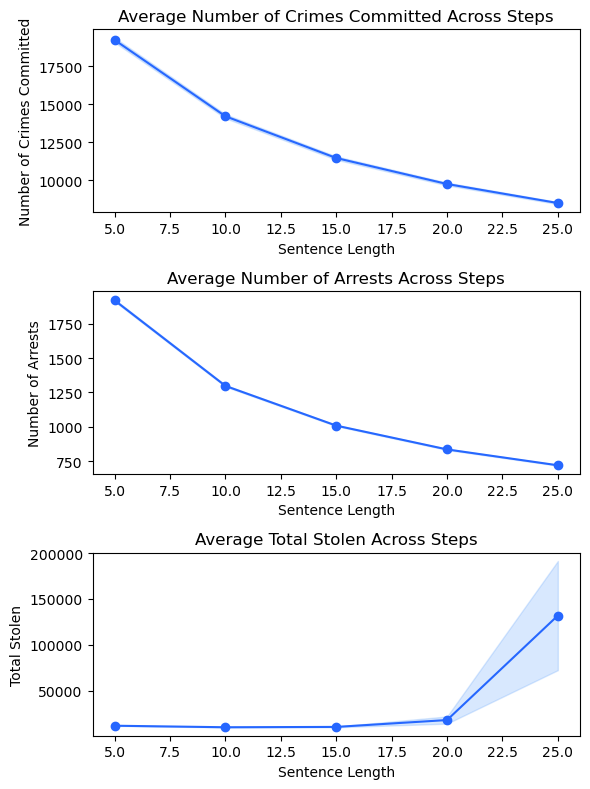

In [4]:
plot_average_all_steps(data, 'sentence_length', 'Sentence Length')

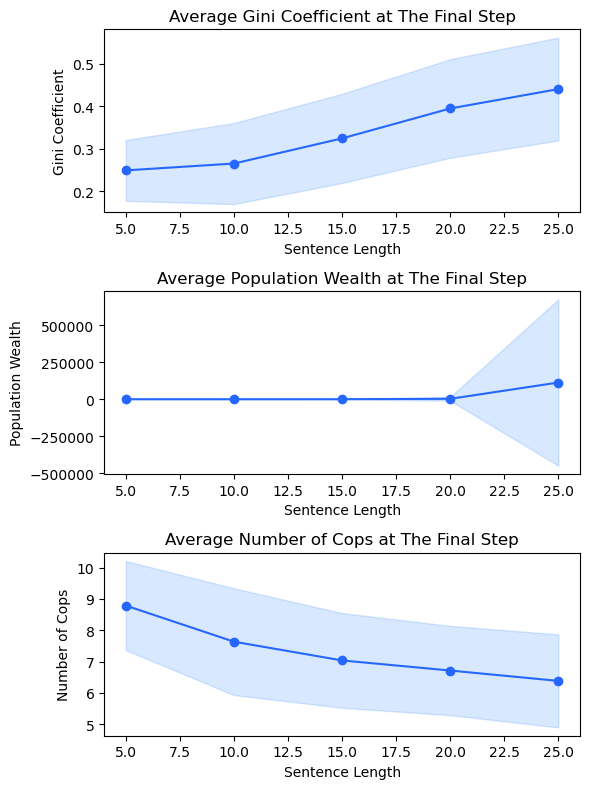

In [5]:
plot_average_last_step(data, 'sentence_length', 'Sentence Length')

### Standard deviation in the distribution of risk aversion
to analyze how homogeneity and diversity in agents' risk profiles would affect the dynamics

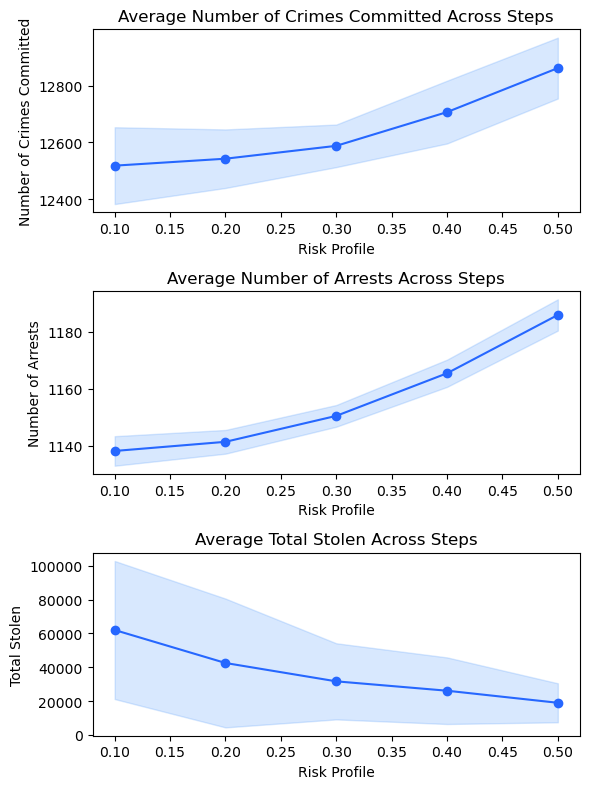

In [6]:
plot_average_all_steps(data, 'risk_aversion_std', 'Risk Profile')

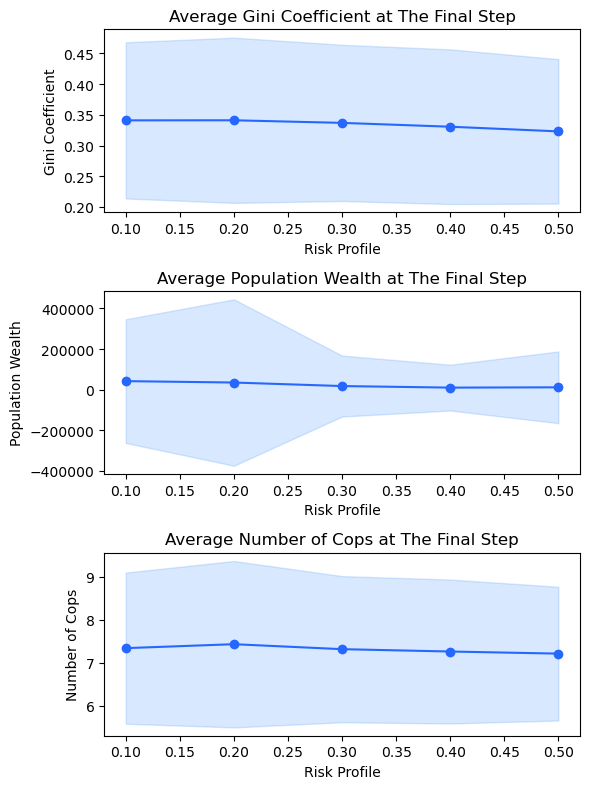

In [7]:
plot_average_last_step(data, 'risk_aversion_std', 'Risk Profile')

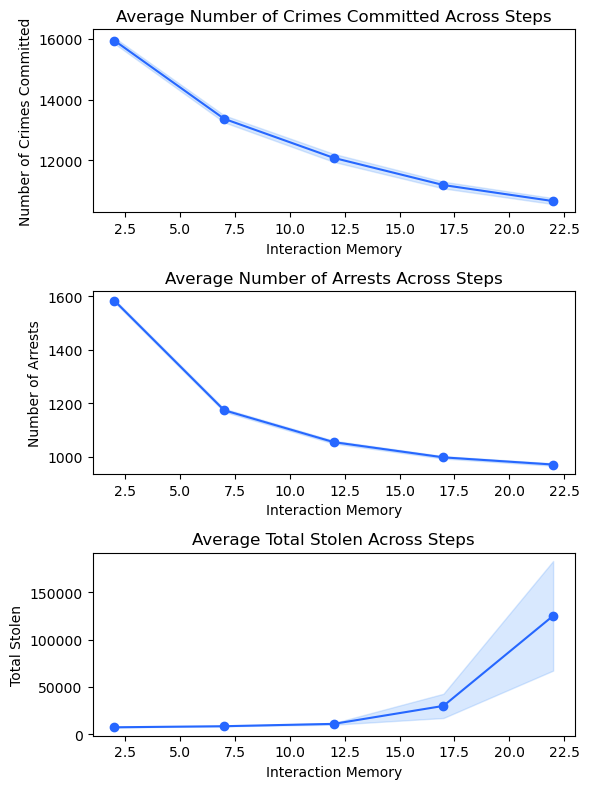

In [8]:
plot_average_all_steps(data, 'interaction_memory', 'Interaction Memory')